# SUICIDE RATE PREDICTION

The objective of this notebook is to predict the suicide rates using Machine Learning algorithms and analyzing them to find correlated factors causing increase in suicide rates globally.

### Steps Involved

Loading the data

Familiarizing with data

Visualizing the data

Data Preprocessing & EDA

Splitting the data

Training the data

Model Performance Comparision

Statistical Tests

Conclusion

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')


### LOADING THE DATA
The dataset is borrowed from Kaggle, https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016. 
The source of those datasets is WHO, World Bank, UNDP and a dataset published in Kaggle.
The overview of this dataset is, it has 27820 samples with 12 features. 

In [2]:
#Loading data into Datframe
data=pd.read_csv("C:\\Users\\Arindam\\Documents\\Downloads\\archive (12)\\master.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### FAMILARIZING WITH DATASET

Few dataframe methods are used to look into the data and its features.

In [3]:
#shape of dataset
data.shape

(27820, 12)

In [4]:
# renaming some columns for clarity
data.rename(columns={"suicides/100k pop":"suicide_rate","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicide_rate', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


In [5]:
#features in dataset
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicide_rate', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [6]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
#suicide count country wise
data['country'].value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [8]:
#suicide count age group wise
data['age'].value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [9]:
#suicide count generation wise
data['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [10]:
#correlation matrix
data.corr()

,year,suicides_no,population,suicide_rate,HDI_for_year,gdp_per_capita
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicide_rate,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI_for_year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita,0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


### OBSERVATIONS

1)HDI for year column has  many missing values therefore need to be removed. None of the other columns have any missing value.

2) There are 6 unique age groups

3) Age is grouped into year buckets as categorical format which needs to be encoded.

4) Gender need be encoded.

5) Scale required numerical features.

6) The generation feature has 6 types of generations.

7) Generation could be encoded as well.

### VISUALIZING THE DATA

Plots and graphs are used to see the distribution of data and relation between different features

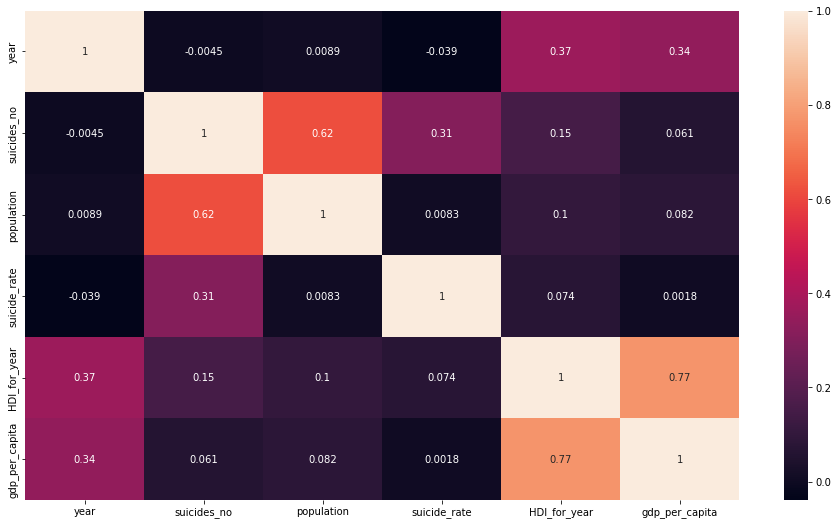

In [11]:
#correlation heatmap
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'suicides_no'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'suicide_rate'}>],
       [<AxesSubplot:title={'center':'HDI_for_year'}>,
        <AxesSubplot:title={'center':'gdp_per_capita'}>]], dtype=object)

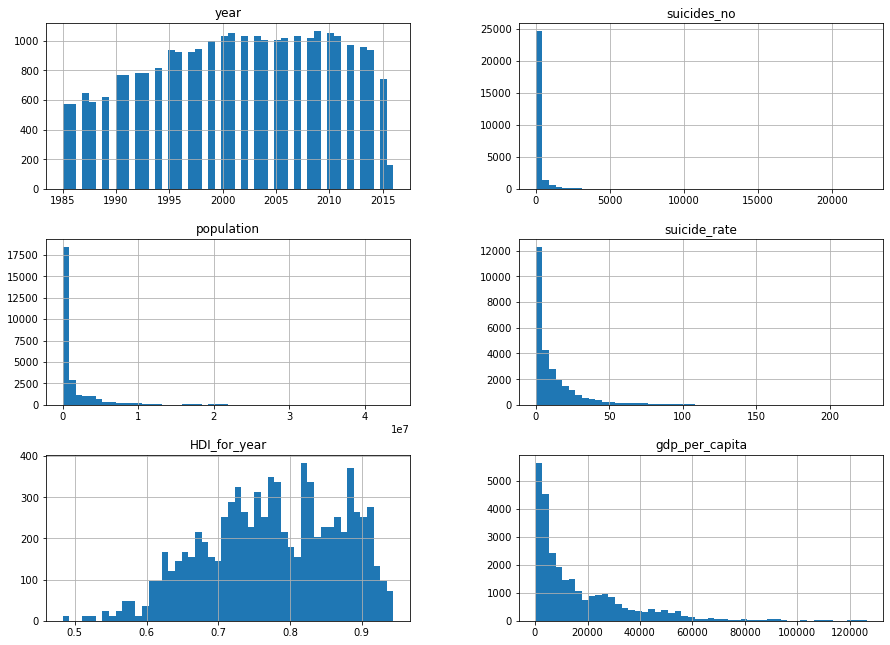

In [12]:
#histplot
data.hist(bins = 50,figsize = (15,11))


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

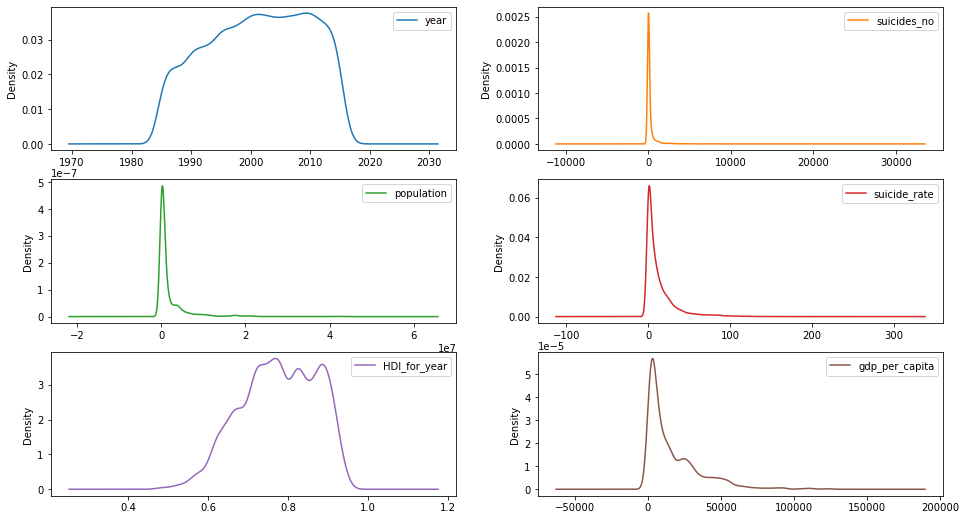

In [13]:
#density plot
data.plot(kind ='density',subplots = True, layout =(3,2),figsize=(16,9),sharex = False)

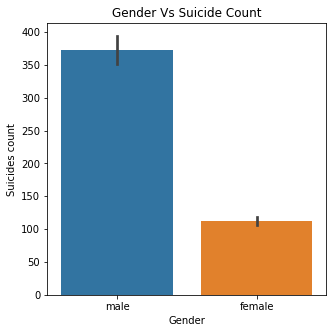

In [14]:
#gender vs Suicide count bar plot
plt.figure(figsize=(5,5))
sns.barplot(data.sex,data.suicides_no)
plt.xlabel("Gender")
plt.ylabel("Suicides count")
plt.title("Gender Vs Suicide Count")


plt.show()

#### The above bar plot shows that the suicide cases are more in male population.

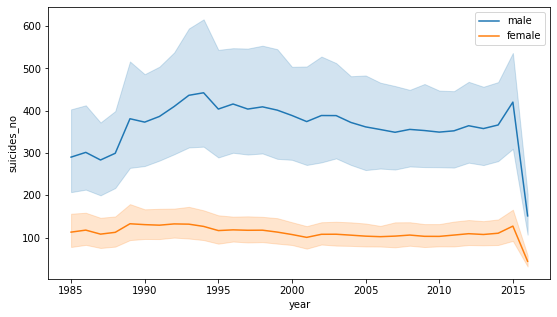

In [15]:
#suicide count line plot of males and females year wise
plt.figure(figsize=(9,5))
data_men = data[data.sex == "male"]
data_women = data[data.sex == "female"]
sns.lineplot(data_men.year, data.suicides_no)
sns.lineplot(data_women.year, data.suicides_no)
plt.legend(["male", 'female'])
plt.show()

#### It has been observed that in every year suicide cases are more in male population than in female

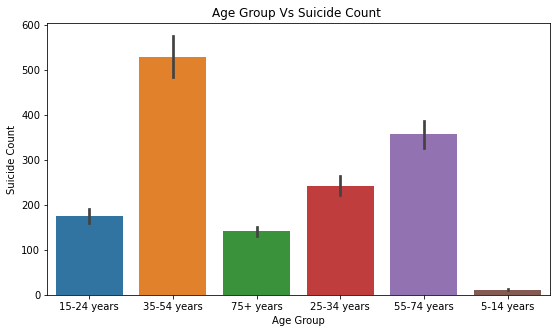

In [16]:
# Age group vs suicide count
plt.figure(figsize=(9,5))
sns.barplot(x=data['age'], y=data['suicides_no'])
plt.xlabel('Age Group')
plt.ylabel('Suicide Count')
plt.title('Age Group Vs Suicide Count ')
plt.show()

#### The above boxplot shows that the suicide cases are more in the age group of 35-54 years followed by 55- 74 years. 

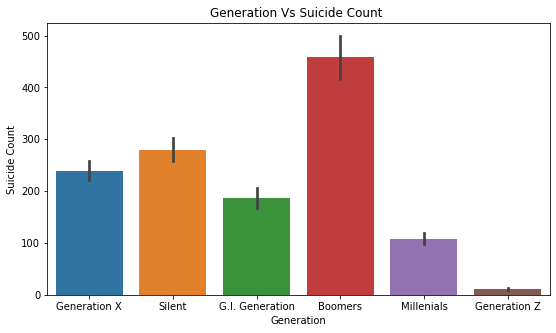

In [17]:
# Generation vs Suicide Count
plt.figure(figsize=(9,5))
sns.barplot(x=data['generation'], y=data['suicides_no'])
plt.xlabel('Generation')
plt.ylabel('Suicide Count')
plt.title('Generation Vs Suicide Count ')
plt.show()

#### The above barplot shows that the suicide cases are more in the boomers, silent and X generations. These generations are made up of people born until 1976 based on the details provided.


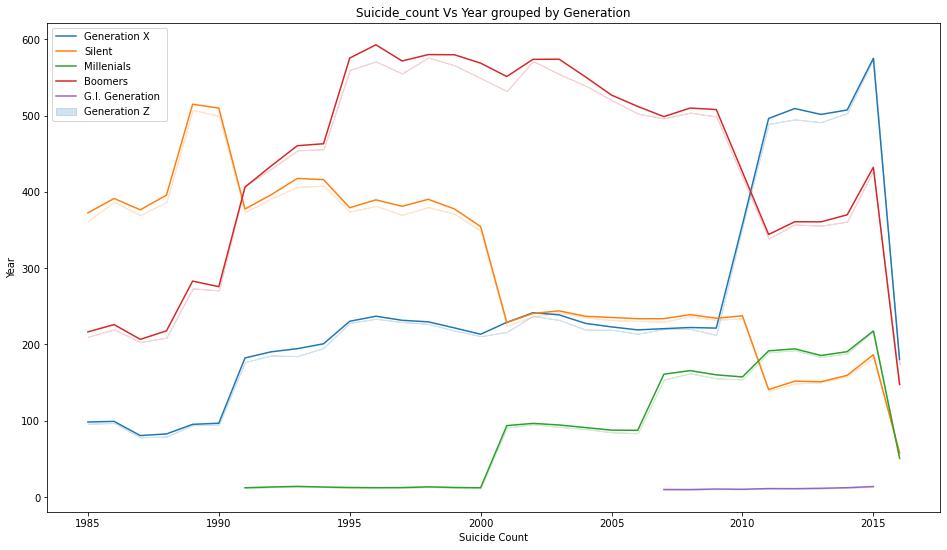

In [18]:
#Suicide count vs Year  grouped by Generation
plt.figure(figsize=(16,9))
generation=['Generation X','Silent','Millenials','Boomers', 'G.I. Generation ','Generation Z']
for i in generation:
    data_gen= data[data.generation==i]
    sns.lineplot(data_gen.year,data_gen.suicides_no,ci=False)
    
plt.legend(['Generation X','Silent','Millenials','Boomers', 'G.I. Generation ','Generation Z'])
plt.title("Suicide_count Vs Year grouped by Generation")
plt.xlabel("Suicide Count")
plt.ylabel("Year")
plt.show()

#### There were more suicides in boomer generation during 1990 to 2010. whereas before 1990 silent generation has more suicide count. it has been observes that the suicide rate of generation X has subsequently increased after 2010.The suicide count for G.I. Generation is least and morever suicides in this generation has been observed after 2007

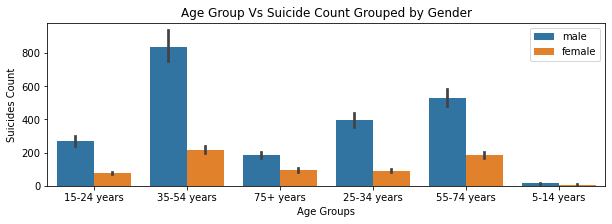

In [19]:
# Age group vs Suicide count grouped by gender
plt.figure(figsize=(10,3))
sns.barplot(x = "age", y = "suicides_no", hue = "sex", data = data)
plt.title("Age Group Vs Suicide Count Grouped by Gender")
plt.xlabel("Age Groups")
plt.ylabel("Suicides Count")
plt.legend()
plt.show()

#### suicides in male population is more irrespective of age groups

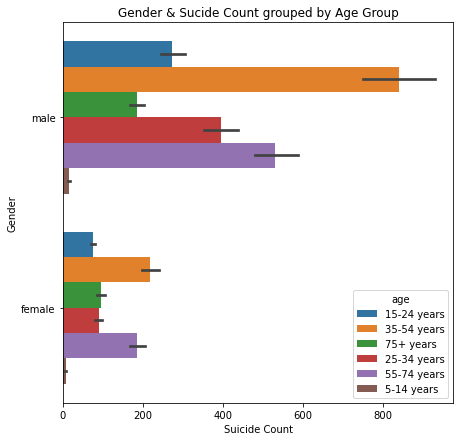

In [20]:
#Gender & Sucide Count grouped by Age Group bar plot

plt.figure(figsize=(7,7))
sns.barplot(y="sex", x="suicides_no", hue="age", data=data)
plt.title('Gender & Sucide Count grouped by Age Group')
plt.ylabel("Gender")
plt.xlabel("Suicide Count")
plt.show()

#### From the above graph, we can infer that 35-54 years age group is more prone to suicides irrespective of the gender frollowed by 55-74 years age group.

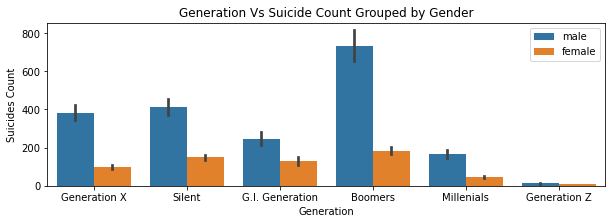

In [21]:
# Genration vs suicide count grouped by gender
plt.figure(figsize=(10,3))
sns.barplot(x = "generation", y = "suicides_no", hue = "sex", data = data)
plt.title("Generation Vs Suicide Count Grouped by Gender")
plt.xlabel("Generation")
plt.ylabel("Suicides Count")
plt.legend()
plt.show()

### males and females tend to commit suicide the most in boomer generation followed by silent and generation X.

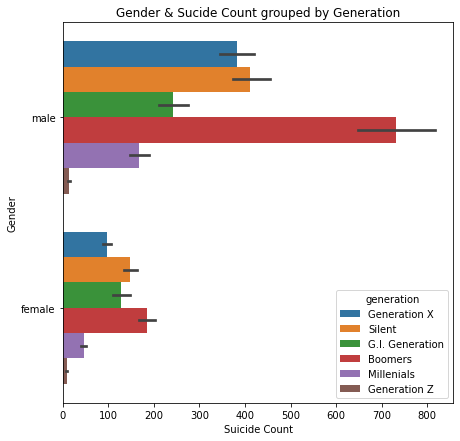

In [22]:
# generation vs suicide count grouped by generation
plt.figure(figsize=(7,7))
sns.barplot(y="sex", x="suicides_no", hue="generation", data=data)
plt.title('Gender & Sucide Count grouped by Generation')
plt.ylabel("Gender")
plt.xlabel("Suicide Count")
plt.show()

#### Even when considered generation, males are more prone to commit suicide.

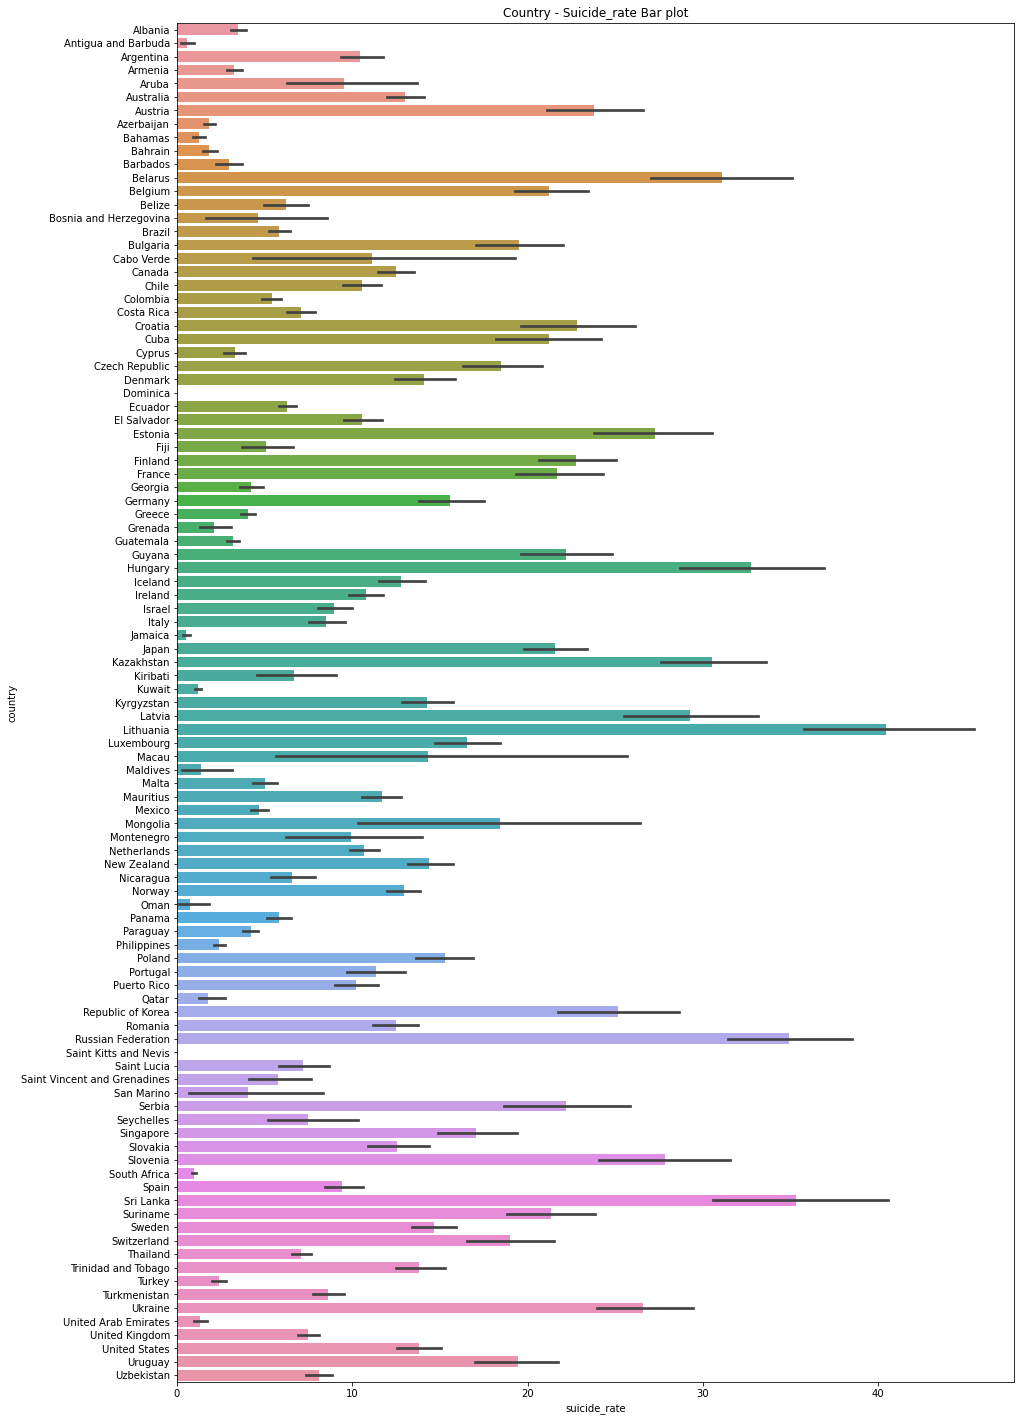

In [23]:
#Country & Suicide_rate Bar plot
plt.figure(figsize=(15,25))
sns.barplot(x = "suicide_rate", y = "country", data = data)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

#### The above plot shows that highes suicide rate country is Lithuania followed by Srilanka

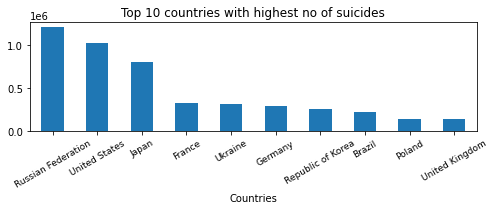

In [24]:
#Top 10 countries with highest number of suicides
plt.figure(figsize=(10,9))
data.groupby('country').sum().suicides_no.sort_values(ascending=False).head(10).plot(kind='bar',figsize=(8,2))
plt.xticks(rotation=30,fontsize=9)
plt.xlabel('Countries')
plt.title('Top 10 countries with highest no of suicides')
plt.show()

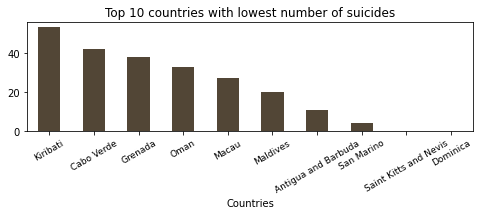

In [25]:
#Top 10 countries with lowest number of suicides
data.groupby('country').sum().suicides_no.sort_values(ascending=False).tail(10).plot(kind='bar',figsize=(8,2),color="#524636")
plt.xticks(rotation=30,fontsize=9)
plt.xlabel('Countries')
plt.title('Top 10 countries with lowest number of suicides')
plt.show()

<AxesSubplot:xlabel='year'>

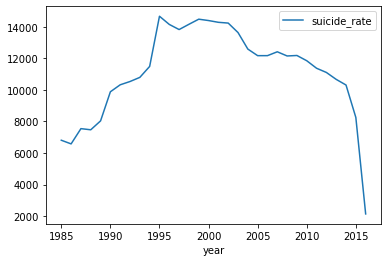

In [26]:
# year vs suicide rate
data[['year','suicide_rate']].groupby(['year']).sum().plot()


#### The observations from the above plot are that the suicide rate had grown rapidly from year 1990 & the rate of suicide has drastically reduced in year 2016. The dataset was collected during early 2016. So all the suicide cases of 2016 are not recorded in the dataset.

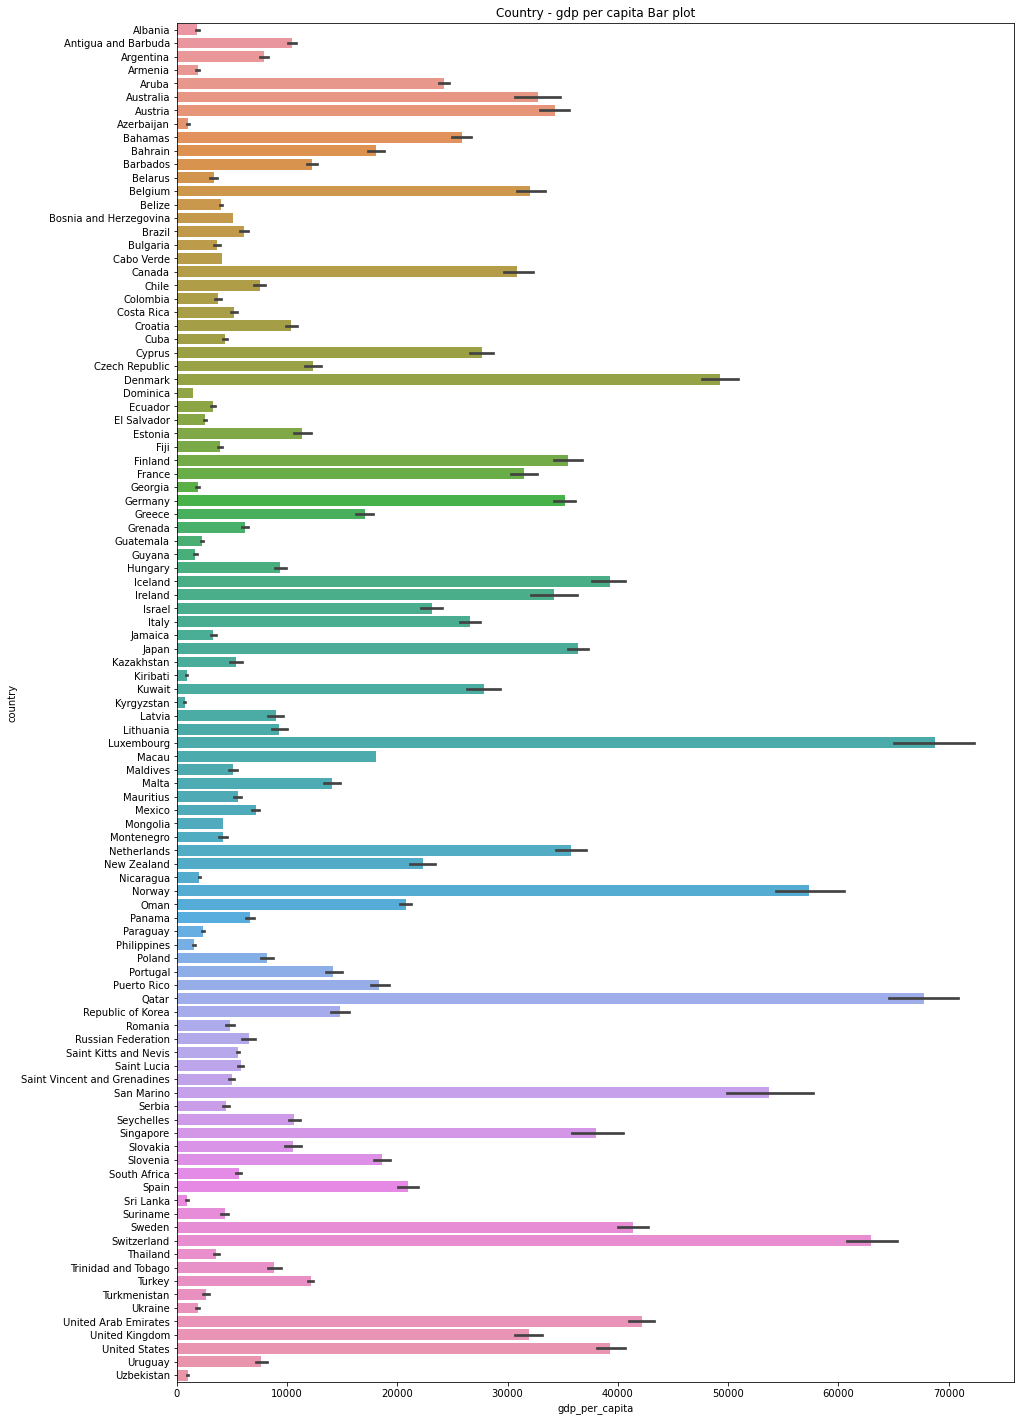

In [27]:
# country vs gdp per capita barplot
plt.figure(figsize=(15,25))
sns.barplot(x = "gdp_per_capita", y = "country", data = data)
plt.title('Country - gdp per capita Bar plot')
plt.show()

#### Luxembourg has the highest gdp per capita followed by qafar

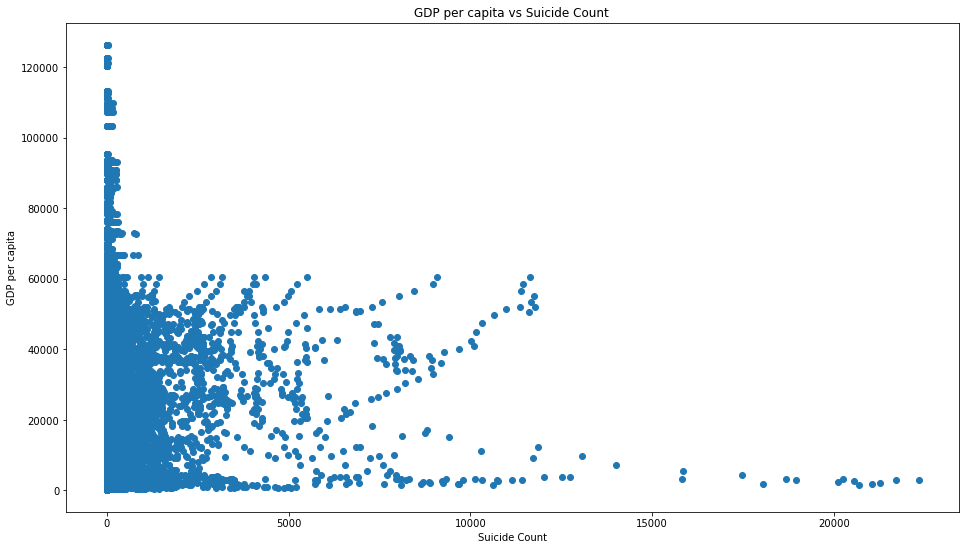

In [28]:
# GDP per capita vs Suicide Count
plt.figure(figsize=(16,9))
plt.scatter(x=data.suicides_no,y=data.gdp_per_capita)
plt.xlabel("Suicide Count")
plt.ylabel("GDP per capita")
plt.title("GDP per capita vs Suicide Count ")
plt.show()

#### Suicide Rate is inversely proportional to GDP per Capita

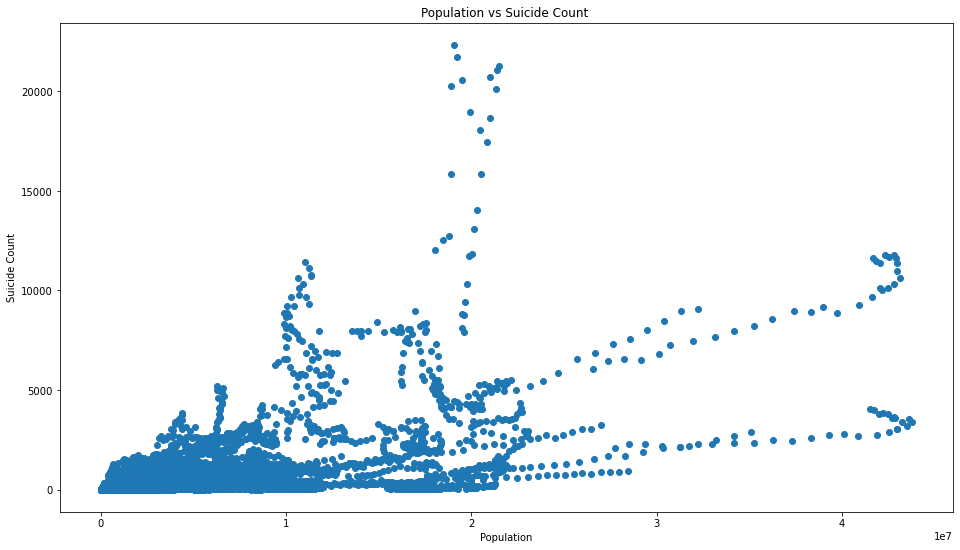

In [29]:
# Population vs Suicide Count
plt.figure(figsize=(16,9))
plt.scatter(x=data.population,y=data.suicides_no)
plt.xlabel("Population")
plt.ylabel("Suicide Count")
plt.title("Population vs Suicide Count ")
plt.show()

<Figure size 1440x720 with 0 Axes>

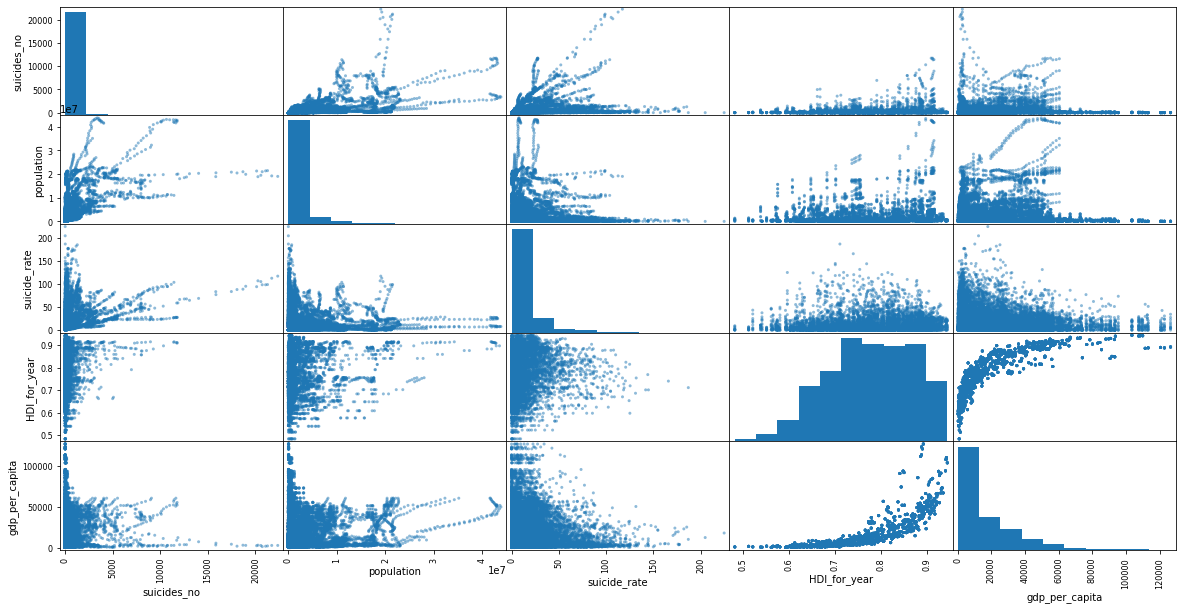

In [30]:
#scatter matrix for checking outlier
plt.figure(figsize=(20,10))
attributes = ['suicides_no', 'population', 'suicide_rate','HDI_for_year', 
              'gdp_for_year','gdp_per_capita']
pd.plotting.scatter_matrix(data[attributes], figsize=(20,10))
plt.show()

year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
suicides_no       AxesSubplot(0.398529,0.536818;0.227941x0.343182)
population        AxesSubplot(0.672059,0.536818;0.227941x0.343182)
suicide_rate            AxesSubplot(0.125,0.125;0.227941x0.343182)
HDI_for_year         AxesSubplot(0.398529,0.125;0.227941x0.343182)
gdp_per_capita       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

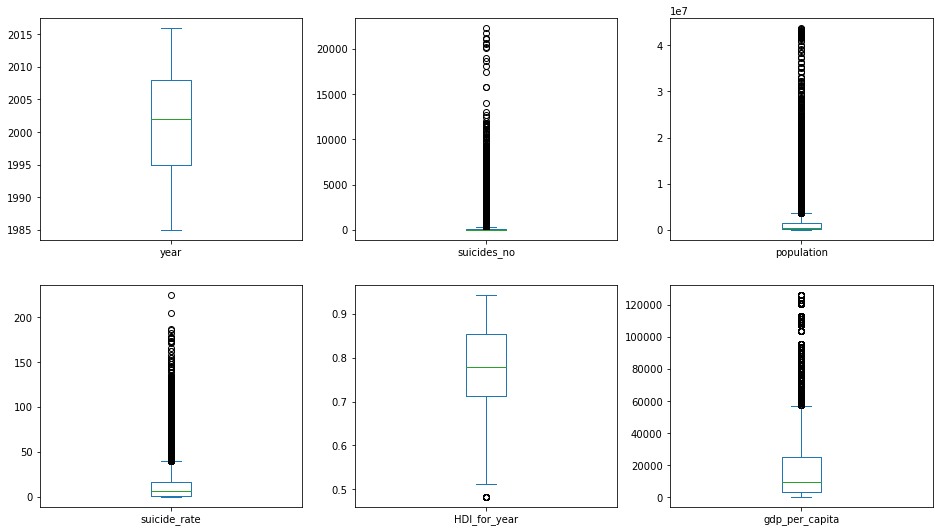

In [31]:
#Boxplot for the outliers
data.plot(kind='box',subplots=True,figsize=(16,9),layout=(2,3))

### DATA PREPROCESSING AND EDA
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [32]:
data.describe()

,year,suicides_no,population,suicide_rate,HDI_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [33]:
#checking for null values
data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicide_rate          0
country-year          0
HDI_for_year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [34]:
#dropping HDI column due to null values
data = data.drop(['HDI_for_year'], axis = 1)
data.shape

(27820, 11)

In [35]:
#The column country-year is just a combination of country and year columns. So dropping that column
data = data.drop(['country-year'], axis = 1)
data.shape

(27820, 10)

In [36]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicide_rate', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')

In [37]:
#dropping off null rows if any
data = data.dropna()
data.shape

(27820, 10)

The non-numerical labeled columns, country, year, gender, age_group and generation are to be converted to numerical labels that can be don by using SkLearn's LabelEncoder.

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
#encoding the categorical features with LabelEncoder
categorical = ['country', 'year','age', 'sex', 'generation']
le = LabelEncoder()

for column in categorical:
    data[column] = le.fit_transform(data[column])

In [40]:
#creating a copy of dataset for statistical test
copy_data=data.copy

In [41]:
#checking the datatypes
data.dtypes

country             int32
year                int64
sex                 int32
age                 int32
suicides_no         int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation          int32
dtype: object

In [42]:
# Converting the column 'gdp_for_year' to float from object
data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)

In [43]:
data.dtypes

country             int32
year                int64
sex                 int32
age                 int32
suicides_no         int64
population          int64
suicide_rate      float64
gdp_for_year      float64
gdp_per_capita      int64
generation          int32
dtype: object

In [44]:
#Scaling the numerical data columns with RobustScalar
numerical = ['suicides_no', 'population', 'suicide_rate', 
              'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
data[numerical] = rc.fit_transform(data[numerical])

In [45]:
data.head(15)

,country,year,sex,age,suicides_no,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,-0.031250,-0.084435,0.045860,-0.182942,-0.400243,2
1,0,2,1,2,-0.070312,-0.087963,-0.050955,-0.182942,-0.400243,5
2,0,2,0,0,-0.085938,-0.101142,-0.073885,-0.182942,-0.400243,2
3,0,2,1,5,-0.187500,-0.294064,-0.089172,-0.182942,-0.400243,1
4,0,2,1,1,-0.125000,-0.112232,-0.172611,-0.182942,-0.400243,0
5,0,2,0,5,-0.187500,-0.284126,-0.202548,-0.182942,-0.400243,1
6,0,2,0,2,-0.148438,-0.108991,-0.244586,-0.182942,-0.400243,5
7,0,2,0,1,-0.164062,-0.124546,-0.282166,-0.182942,-0.400243,0
8,0,2,1,4,-0.187500,-0.210745,-0.335032,-0.182942,-0.400243,1
9,0,2,0,3,-0.195312,-0.085803,-0.381529,-0.182942,-0.400243,2


### SPLITTING THE DATASET

In [46]:
#separating data and target column
Y = data['suicide_rate']
X = data.drop('suicide_rate',axis=1)

In [47]:
X.shape

(27820, 9)

In [48]:
Y.shape

(27820,)

In [49]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 9), (5564, 9))

In [50]:
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((22256,), (5564,))

### Model building and Training
 Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.
    
     There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

Linear Regression

Polynomial Regression

Decision Tree

Random Forest

Gradient Boosting

XGBoost

Bagging Regression

MultiLayer Perceptrons
             .

In [51]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []
mse_train=[]
mse_test=[]
#function to call for storing the results
def storeResults(model, a,b,c,d,e,f):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))
  mse_train.append(round(e, 3))
  mse_test.append(round(f, 3))

In [52]:
#importing requiredlibraries
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
# function for fitting the model to datasets and calculating the metrics
def function(modelname,model):
    
    model.fit(X_train, y_train)
    y_train_model = model.predict(X_train)
    y_test_model = model.predict(X_test)
    acc_train_model = r2_score(y_train, y_train_model)
    acc_test_model = r2_score( y_test,y_test_model)
    mse_train_model = mean_squared_error(y_train, y_train_model)
    mse_test_model = mean_squared_error(y_test, y_test_model)
    rmse_train_model = np.sqrt(mean_squared_error(y_train, y_train_model))
    rmse_test_model= np.sqrt(mean_squared_error(y_test, y_test_model))
    print('MSE train data: {:.5}           MSE test data: {:.5}'.format( mse_train_model, mse_test_model))
    print('RMSE train data: {:.5}          RMSE test data: {:.5}'.format(rmse_train_model,rmse_train_model))
    print('Accuracy train data: {:.5}            Accuracy test data: {:.5}'.format(acc_train_model,acc_test_model))
    storeResults(modelname, acc_train_model, acc_test_model, rmse_train_model, rmse_test_model,mse_train_model,mse_test_model )

### 1) Linear Regresssion

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
Linear_Regression=LinearRegression();
function("Linear Regression",Linear_Regression)

MSE train data: 1.026           MSE test data: 1.0753
RMSE train data: 1.0129          RMSE test data: 1.0129
Accuracy train data: 0.28813            Accuracy test data: 0.29615


In [56]:
from sklearn.model_selection import cross_val_score
lr_cv = cross_val_score(LinearRegression(), X, Y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(lr_cv.mean(), lr_cv.std() * 2)) 

Accuracy: 0.24 (+/- 0.1)


#### The model preformance is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting.

### 2) Polynomial Regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures

X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split( X_poly, Y, test_size=0.1, random_state=42)

In [58]:
pr = LinearRegression()
function("Polynomial Regression" ,pr)


MSE train data: 1.026           MSE test data: 1.0753
RMSE train data: 1.0129          RMSE test data: 1.0129
Accuracy train data: 0.28813            Accuracy test data: 0.29615


#### The result is not so good even afer introducing polynomial features

### 3)Decision Tree Regression

In [59]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
DecisionTreeRegression= DecisionTreeRegressor(max_depth=9)
# fit the model 
function("Decision Tree Regression",DecisionTreeRegression)


MSE train data: 0.048248           MSE test data: 0.073623
RMSE train data: 0.21965          RMSE test data: 0.21965
Accuracy train data: 0.96652            Accuracy test data: 0.95181


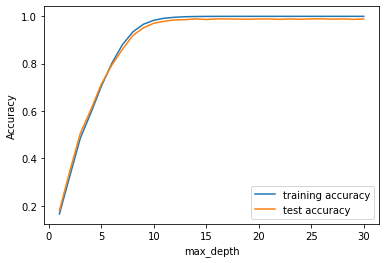

In [60]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
  # fit the model
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(tree.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

#### OBSERVATIONS: The model preformance is gradually increased on incresing the max_depth parameter. But after max_depth = 9, the model overfits. So the model is considered with max_depth = 9 

### RANDOM FOREST REGRESSION

In [61]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
RandomForestRegression = RandomForestRegressor(max_depth=9)
function("RandomForestRegression",RandomForestRegression )

MSE train data: 0.019097           MSE test data: 0.031042
RMSE train data: 0.13819          RMSE test data: 0.13819
Accuracy train data: 0.98675            Accuracy test data: 0.97968


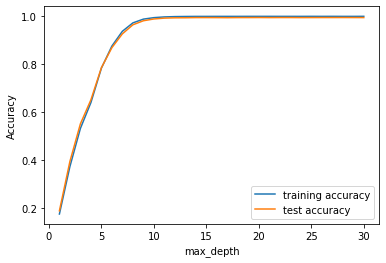

In [62]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
  # fit the model
  forest = RandomForestRegressor(max_depth=n)
  forest.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(forest.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

#### The random forest gives us an accuracy of 98.7% on training data and 98.03% on test data that is  better than the linear models or a single decision tree.

### Gradient Boosting Regression 

In [63]:
# Gradient Boosted Regression Trees model
from sklearn.ensemble import GradientBoostingRegressor

# instantiate the model
gbrt = GradientBoostingRegressor(learning_rate=0.5)

# fit the model 
function("GradientBoostingRegressor",gbrt)

MSE train data: 0.016957           MSE test data: 0.025332
RMSE train data: 0.13022          RMSE test data: 0.13022
Accuracy train data: 0.98823            Accuracy test data: 0.98342


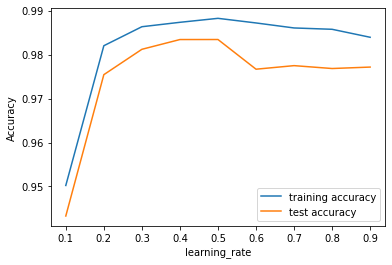

In [64]:
training_accuracy = []
test_accuracy = []
r = []
# try learning_rate from 0.1 to 0.9
rate = range(1, 10)
for n in rate:
  # fit the model
  gbrt = GradientBoostingRegressor(learning_rate=n*0.1)
  gbrt.fit(X_train, y_train)
  r.append(n*0.1)
  # record training set accuracy
  training_accuracy.append(gbrt.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(gbrt.score(X_test, y_test))

#plotting the training & testing accuracy for learning_rate from 0.1 to 0.9

plt.plot(r, training_accuracy, label="training accuracy")
plt.plot(r, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend()

#### OBSERVATIONS: The model provides a good accuracy

#### Hyper tuning is performed for Gradient Boosted Regression Tree model. The tuned parameters are learning_rate, n_estimators & max_depth. Even upon changing the n_estimators with the combination of other two, there is no change in the model performance.


### XGBoost Regression

In [65]:
from xgboost import XGBRegressor

# instantiate the model
xgb = XGBRegressor(learning_rate=0.2,max_depth=4)
#fit the model
function("XGBRegressor",xgb)

MSE train data: 0.0099227           MSE test data: 0.017922
RMSE train data: 0.099613          RMSE test data: 0.099613
Accuracy train data: 0.99312            Accuracy test data: 0.98827


#### XGboost Regression provides a good accuracy score of 98.8 % on test data and  99.3%on training data

### Bagging Regression

In [66]:
from sklearn.ensemble import BaggingRegressor

#instantiate the model
br = BaggingRegressor(n_estimators=1)

#fit the model
function("BaggingRegressor",br)

MSE train data: 0.016532           MSE test data: 0.026777
RMSE train data: 0.12858          RMSE test data: 0.12858
Accuracy train data: 0.98853            Accuracy test data: 0.98247


Evaluating training and testing set performance with different numbers of n_estimators from 1 to 50. The plot shows the training and test set accuracy on the y-axis against the setting of n_estimators on the x-axis.

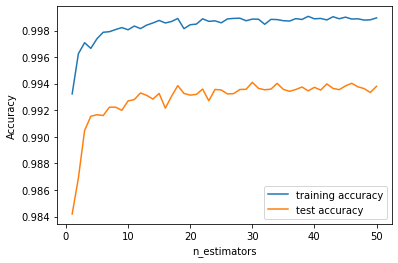

In [67]:
training_accuracy = []
test_accuracy = []
# try n_estimators from 1 to 50
est = range(1, 51)
for n in est:
  # fit the model
  br = BaggingRegressor(n_estimators=n)
  br.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(br.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(br.score(X_test, y_test))

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.plot(est, training_accuracy, label="training accuracy")
plt.plot(est, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

#### From the above plot, it is clear that the model performs very well on this dataset. Even with tuning of n_estimators parameters, the training accuracy always stayed above 99% & the test data accuracy is always above 97%. This may or may not be the case of overfitting.

### MultiLayer Perceptrons

In [68]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPRegressor

# instantiate the model
mlp = MLPRegressor(hidden_layer_sizes=([100,100]))
function("MLPRegressor",mlp)

MSE train data: 0.24558           MSE test data: 0.25218
RMSE train data: 0.49556          RMSE test data: 0.49556
Accuracy train data: 0.8296            Accuracy test data: 0.83494


### COMPARISION OF MODELS

In [69]:
#creating a dataframe for storing the metrics result
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test,
    'Mse_train':  mse_train,'mse test':
mse_test})

In [70]:
results

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE,Mse_train,mse test
0,Linear Regression,0.288,0.296,1.013,1.037,1.026,1.075
1,Polynomial Regression,0.288,0.296,1.013,1.037,1.026,1.075
2,Decision Tree Regression,0.967,0.952,0.220,0.271,0.048,0.074
3,RandomForestRegression,0.987,0.980,0.138,0.176,0.019,0.031
4,GradientBoostingRegressor,0.988,0.983,0.130,0.159,0.017,0.025
5,XGBRegressor,0.993,0.988,0.100,0.134,0.010,0.018
6,BaggingRegressor,0.989,0.982,0.129,0.164,0.017,0.027
7,MLPRegressor,0.830,0.835,0.496,0.502,0.246,0.252


In [71]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE,Mse_train,mse test
5,XGBRegressor,0.993,0.988,0.100,0.134,0.010,0.018
4,GradientBoostingRegressor,0.988,0.983,0.130,0.159,0.017,0.025
6,BaggingRegressor,0.989,0.982,0.129,0.164,0.017,0.027
3,RandomForestRegression,0.987,0.980,0.138,0.176,0.019,0.031
2,Decision Tree Regression,0.967,0.952,0.220,0.271,0.048,0.074
7,MLPRegressor,0.830,0.835,0.496,0.502,0.246,0.252
0,Linear Regression,0.288,0.296,1.013,1.037,1.026,1.075
1,Polynomial Regression,0.288,0.296,1.013,1.037,1.026,1.075


### Among all the trained models, XGBoost performance is better. It is understandable because this model is very good in execution Speed & model performance.

## Statistical test

#### Statistical tests are used in hypothesis testing. They can be used to:determine whether a predictor variable has a statistically significant relationship with an outcome variable.

#### estimate the difference between two or more groups

In [72]:
#importig required libraries
from scipy import stats

###  Test 1: To check the difference in suicide rates between male and female
Using independent sample t-test to check the difference in suicide rates between male and female. The hypothesis statements for this test are: 

**H0:** There is no difference in the suicide rates among male and female (Null).<br>
**H1:** There is difference in the suicide rates among male and female (Alternate).

In [73]:
#collecting male suicide rate data
male = data['suicide_rate'][data['sex'] == 1]
male

0        0.045860
1       -0.050955
3       -0.089172
4       -0.172611
8       -0.335032
           ...   
27809    0.357962
27811    0.340127
27812    0.325478
27813    0.100000
27817   -0.243312
Name: suicide_rate, Length: 13910, dtype: float64

In [74]:
#collecting female suicide rate data
female = data['suicide_rate'][data['sex'] == 0]
female

2       -0.073885
5       -0.202548
6       -0.244586
7       -0.282166
9       -0.381529
           ...   
27814   -0.004459
27815   -0.192994
27816   -0.217197
27818   -0.275159
27819   -0.288535
Name: suicide_rate, Length: 13910, dtype: float64

In [75]:
#calculating p value
ttest,pval = stats.ttest_rel(male, female)

In [76]:
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


### **TEST CONCLUSION**
#### By performing T-test, the result obtained is to reject the null hypothesis. This basically means that there isdifferent in suicide rates of male & female.

### Test 2: To find out the dependence of suicide rate on the age.
Finding out whether there is a dependence of suicide rate on the age using the Chi- Square test. The hypothesis statements for this test are: 

**H0:** Suicide rate and age are independent (Null).<br>
**H1:** Suicide rate and age are dependent (Alternate). 

In [77]:
#creating contingency Table
contingency_table = pd.crosstab(data.suicide_rate, data.age)

In [78]:
contingency_table.head()

age,0,1,2,3,4,5
suicide_rate,,,,,,
-0.381529,511,451,370,1468,559,922
-0.380255,0,0,0,5,0,0
-0.379618,0,1,0,7,0,0
-0.378981,0,0,0,14,0,0
-0.378344,0,0,0,10,0,0


In [79]:
#Significance level 5%
alpha=0.05

In [80]:
chistat, p, dof, expected = stats.chi2_contingency(contingency_table )

In [81]:
#critical_value
critical_value=stats.chi2.ppf(q=1-alpha,df=dof)
print('critical_value:',critical_value)

critical_value: 26864.700169422224


In [82]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chistat)
print('critical_value:',critical_value)
print('p-value:',p) 
#Here, pvalue = 0.0 and a low pvalue suggests that your sample provides enough evidence that you can reject  H0  for the entire population.

Significance level:  0.05
Degree of Freedom:  26485
chi-square statistic: 39571.48433519147
critical_value: 26864.700169422224
p-value: 0.0


In [83]:
#compare chi_square_statistic with critical_value and p-value which is the 
 #probability of getting chi-square>0.09 (chi_square_statistic)
if chistat>=critical_value:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")
    
if p<=alpha:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")

Reject H0,There is a dependency between Age group & Suicide rate.
Reject H0,There is a dependency between Age group & Suicide rate.


### Test Conclusion:

#### By performing Chi- Square test, the result obtained is to reject the null hypothesis. This basically means that there is dependency between Age group & Suicide rate.

### CONCLUSION

### *Understand the working of different Machine Learning Models on the Dataset and understanding their parameters,how to tune the and how they affect the model performance.*
### *The final conclusion on the suicide dataset are that the irrespective of age group and generation, male population are more prone to commit suicide than female.*